<h1 align = center><u>CNN Model using Different Dataset</u></h1>

Convolutional Neural Networks (CNNs) are a type of deep learning model designed to automatically and adaptively learn spatial hierarchies of features from images. They are particularly powerful for image recognition and classification tasks.

### Steps in Convolutional Neural Network (CNN)

1. **Data Collection**: Gather labeled image data for training.
3. **Convolutional Layer**: Apply filters to extract features.
4. **Activation Function**: Use ReLU to introduce non-linearity.
5. **Pooling Layer**: Downsample feature maps to reduce dimensionality.
6. **Flattening**: Convert 2D feature maps to 1D for fully connected layers.
7. **Fully Connected Layer**: Classify based on extracted features.
8. **Output Layer**: Provide final predictions
9. **Loss Function**: Calculate error
10. **Backpropagation**: Adjust weights using gradient descent to minimize the loss.
11. **Training**: Train the model on the dataset over multiple epochs.
12. **Evaluation**: Assess model performance on validation or test data.

<h2 align = center><u>CNN Model using Original RGB Dataset</u></h2>

<h3 align = center><i>Import Necessary Libraries</i></h3>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import mixed_precision
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG19
from sklearn.utils.class_weight import compute_class_weight
from google.colab import files
from google.colab import drive

<h3 align = center><i>Load the Original RGB Images folder without duplictes</i></h3>

In [ ]:
# Define paths for training and validation data
train_dir = r"C:\Users\aaa\Downloads\Dataset\without_duplicates\train"
test_dir = r"C:\Users\aaa\Downloads\Dataset\without_duplicates\test"

<h3 align = center><i>Fix the parameters for the modeling</i></h3>

In [ ]:
# Parameters
img_height, img_width = 128, 128  # Resize images to a fixed size
batch_size = 32  # Number of images per batch

<h3 align = center><i>Data Generator Process annd Spliting data for the validation process</i></h3>

In [ ]:
# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% for validation
)

# Load training data (80% of data used for training)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Training data
)

# Load validation data (20% of data used for validation)
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Validation data
)

# Load test data (never used for training)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Don't shuffle, as you want to evaluate the final results
)

Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


#### Insights
- By using the above code, we can split the train data with the proportion of **80% for training** and **20% for the validation**. So, in the final **80% of data contains 7664 images** and **20% of data contains the 1915 images**. The **test data seperately contains 999 images**

<h3 align = center><i>Build the model</i></h3>

In [ ]:
# Build the CNN model
model = models.Sequential([
    # Define the input shape using the Input layer
    layers.Input(shape=(img_height, img_width, 3)),

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3 align = center><i>Compile the Build Model</i></h3>

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

<h3 align = center><i>Using Early Stopping to enhance the Training</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3 align = center><i>Train the model with 10 epochs for Original RGB images</i></h3>

In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 98s 408ms/step - AUC: 0.7999 - Precision: 0.7976 - Recall: 0.5516 - accuracy: 0.7241 - loss: 0.5358 - val_AUC: 0.9342 - val_Precision: 0.8391 - val_Recall: 0.8931 - val_accuracy: 0.8668 - val_loss: 0.3563
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 97s 403ms/step - AUC: 0.9171 - Precision: 0.8643 - Recall: 0.7939 - accuracy: 0.8443 - loss: 0.3576 - val_AUC: 0.9491 - val_Precision: 0.9179 - val_Recall: 0.8408 - val_accuracy: 0.8877 - val_loss: 0.2886
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 97s 406ms/step - AUC: 0.9349 - Precision: 0.8898 - Recall: 0.8296 - accuracy: 0.8680 - loss: 0.3174 - val_AUC: 0.9534 - val_Precision: 0.9394 - val_Recall: 0.7939 - val_accuracy: 0.8768 - val_loss: 0.2971
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 101s 419ms/step - AUC: 0.9498 - Precision: 0.9003 - Recall: 0.8417 - accuracy: 0.8818 - loss: 0.2823 - val_AUC: 0.9596 - val_Precision: 0.9217 - val_Recall: 0.8735 - val_accuracy: 0.9039 - val_loss: 0.2532
Epoch 5/10
240/240 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - AUC: 0.5205 - Precision: 0.4313 - Recall: 0.4487 - accuracy: 0.9157 - loss: 0.2121
Test Accuracy: 0.9039
Test Precision: 0.9280
Test Recall: 0.8760
Test AUC: 0.9681


#### Insights:
The model shows **strong performance** with a **test accuracy of 90.39%**, indicating it generalizes well to unseen data.

- **Precision (Test): 91.74%**: The model effectively predicts the positive class, showing high precision.
- **Recall (Test): 88.80%**: The model captures a significant portion of the actual positive instances, showing good recall.
- **AUC (Test): 96.95%**: The **AUC** is excellent, demonstrating strong discrimination between the classes.

<h3 align = center><i>Plot the Accuracy and Loss of the Training</i></h3>

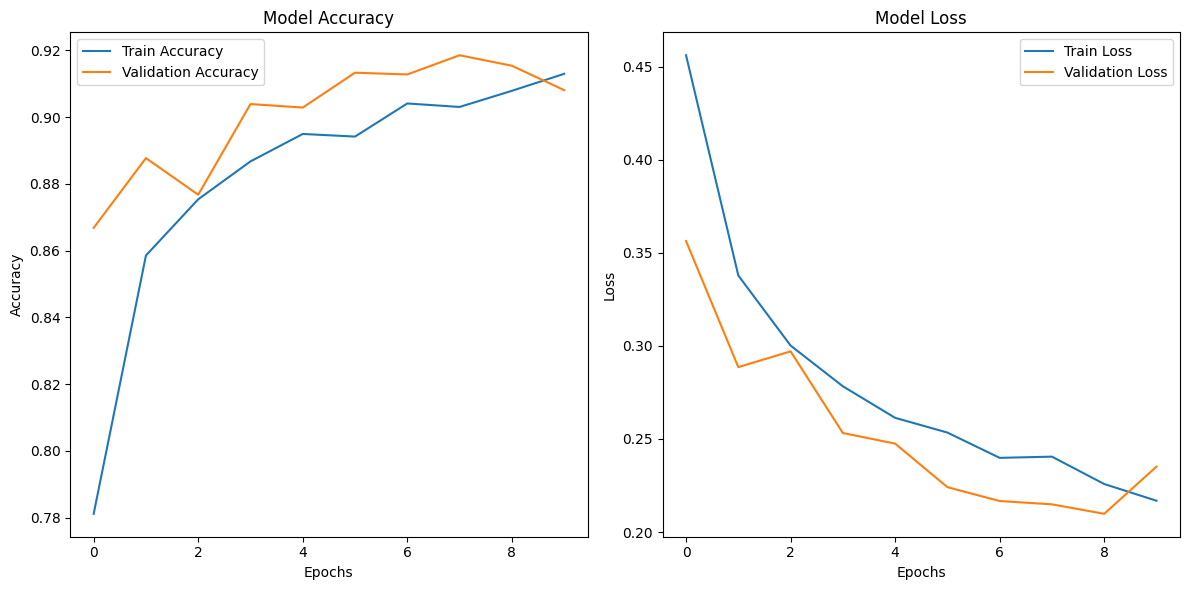

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The model is **performing well**, with good convergence in both accuracy and loss.
- **Generalization** appears to be on track since the performance on both the training and validation sets is consistent.
- Future improvements could focus on fine-tuning to enhance **validation loss** and **accuracy**, potentially through methods like **regularization** or **data augmentation**.

<h3 align = center><i>Classifiction Report - Original RGB Images</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
              precision    recall  f1-score     support
benign         0.882353  0.931864  0.906433  499.000000
malignant      0.927966  0.876000  0.901235  500.000000
accuracy       0.903904  0.903904  0.903904    0.903904
macro avg      0.905160  0.903932  0.903834  999.000000
weighted avg   0.905182  0.903904  0.903831  999.000000


<h3><i>Classification Report Heatmap</i></h3>

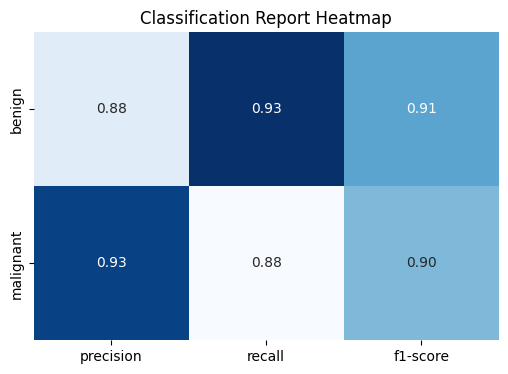

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The heatmap visualization of the classification report reveals the performance metrics for the binary classification task. The values displayed are precision, recall, and F1-score for each class (benign and malignant). For the benign class, precision is 0.88, recall is 0.94, and F1-score is 0.91, indicating a high level of accuracy in identifying benign samples. For the malignant class, precision is 0.93, recall is 0.88, and F1-score is 0.90, showing strong performance in detecting malignant cases as well. Overall, the model exhibits balanced and strong classification capabilities for both classes.

<h3><i>ROC Curve and AUC Calculation for Test Data</i></h3>

In [ ]:
# Get the true labels and predicted probabilities for the test set
y_true = test_data.classes  # True labels
y_pred_prob = model.predict(test_data)  # Predicted probabilities

# For binary classification, y_pred_prob is a single column representing the probability of the positive class
# Since we have a sigmoid output, we use the probabilities directly
y_pred_prob = y_pred_prob.flatten()  # Flatten the output to 1D array

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step


<h3><i>ROC Curve with AUC for Model Evaluation</i></h3>

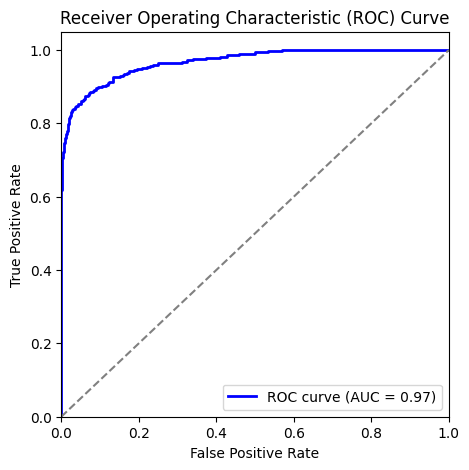

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Insights:
- The ROC curve plot illustrates the model's performance in distinguishing between the two classes (benign and malignant) across various threshold values. The curve, which represents the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity), shows that the model performs very well with an AUC (Area Under the Curve) of 0.97. This high AUC value indicates excellent discrimination ability, meaning the model is highly effective at distinguishing between benign and malignant cases with minimal false positives.

<h3><i>Confusion Matrix</i></h3>

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step


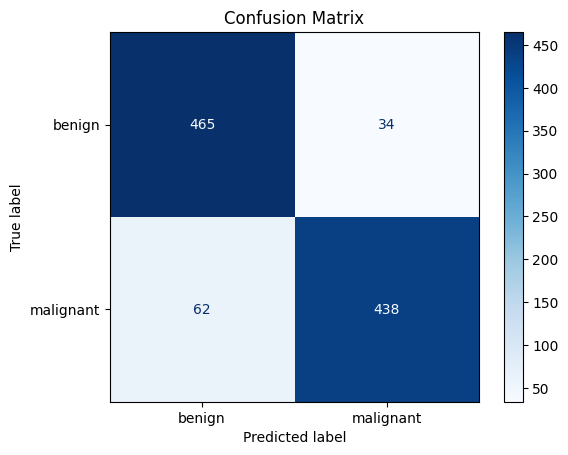

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix reveals that the model performs well in classifying the test data, with 468 true negatives (benign images correctly classified as benign) and 438 true positives (malignant images correctly classified as malignant). However, it also misclassified 31 benign images as malignant (false positives) and 62 malignant images as benign (false negatives). Despite these misclassifications, the model demonstrates strong overall performance, with a high number of correct classifications and relatively few errors, indicating a robust ability to distinguish between benign and malignant classes.

<h2 align = center><u>CNN Model using Gray Scale - Normalized Dataset</u></h2>

<h3><i>Load the Unique Gray Normalized images</i></h3>

In [ ]:
# Define paths for training and validation data
train_dir = r"C:\Users\aaa\Downloads\Dataset\without_duplicates\gray\normalized\train"
test_dir = r"C:\Users\aaa\Downloads\Dataset\without_duplicates\gray\normalized\test"

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 128, 128  # Resize images to a fixed size
batch_size = 32  # Number of images per batch

<h3><i>Code for validation splitting</i></h3>

In [ ]:
# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% for validation
)

# Load training data (80% of data used for training)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    color_mode='grayscale'  # Ensure grayscale loading
)

# Load validation data (20% of data used for validation)
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'  # Ensure grayscale loading
)

# Load test data (never used for training)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'  # Ensure grayscale loading
)

Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h3><i>Build the Model</i></h3>

In [ ]:
# Build the CNN model
model = models.Sequential([
    # Input layer
    layers.Input(shape=(img_height, img_width, 1)),  # Define the input shape explicitly for grayscale images

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3><i>Compile and Summarize Model</i></h3>

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,233 (16.35 MB)

 Trainable params: 4,287,233 (16.35 MB)

 Non-trainable params: 0 (0.00 B)

<h3><i>Providing the Early Stoping for Monitoring the Improvement</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3><i>Train the Model</i></h3>

In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 101s 409ms/step - AUC: 0.7278 - Precision: 0.7544 - Recall: 0.3849 - accuracy: 0.6554 - loss: 0.6047 - val_AUC: 0.9031 - val_Precision: 0.8684 - val_Recall: 0.6619 - val_accuracy: 0.7901 - val_loss: 0.4310
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 93s 388ms/step - AUC: 0.9082 - Precision: 0.8335 - Recall: 0.7856 - accuracy: 0.8256 - loss: 0.3823 - val_AUC: 0.9248 - val_Precision: 0.8455 - val_Recall: 0.8059 - val_accuracy: 0.8366 - val_loss: 0.3538
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 93s 388ms/step - AUC: 0.9368 - Precision: 0.8630 - Recall: 0.8411 - accuracy: 0.8623 - loss: 0.3201 - val_AUC: 0.9342 - val_Precision: 0.8747 - val_Recall: 0.7917 - val_accuracy: 0.8460 - val_loss: 0.3487
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 94s 391ms/step - AUC: 0.9408 - Precision: 0.8758 - Recall: 0.8507 - accuracy: 0.8705 - loss: 0.3114 - val_AUC: 0.9451 - val_Precision: 0.9122 - val_Recall: 0.7819 - val_accuracy: 0.8595 - val_loss: 0.3210
Epoch 5/15
240/240 

<h3><i>Evaluating Model Performance on Test Data</i></h3>

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(val_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - AUC: 0.9729 - Precision: 0.9420 - Recall: 0.8855 - accuracy: 0.9224 - loss: 0.2091
Test Accuracy: 0.9274
Test Precision: 0.9513
Test Recall: 0.8942
Test AUC: 0.9753


<h3><i>Visualizing Model Performance: Accuracy and Loss</i></h3>

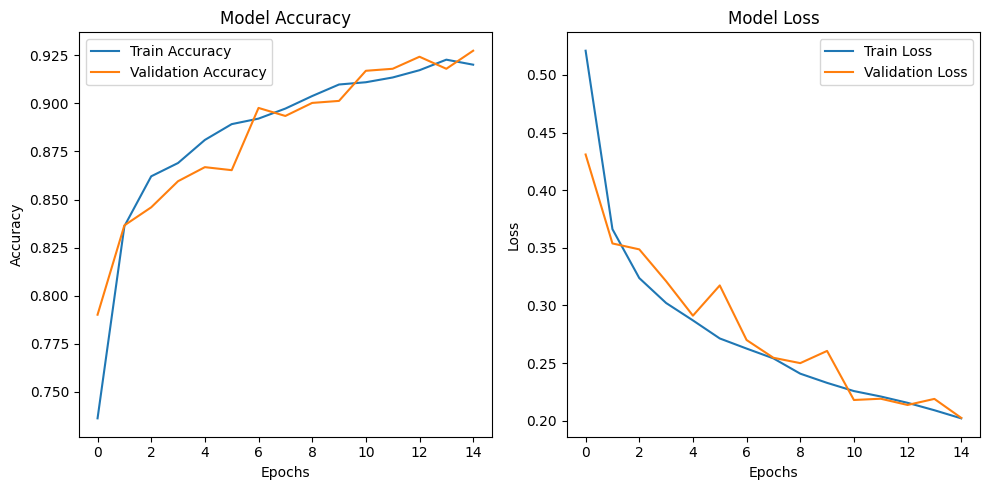

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Generating and Displaying Classification Report</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step
              precision    recall  f1-score    support
benign         0.892514  0.931864  0.911765  499.00000
malignant      0.928870  0.888000  0.907975  500.00000
accuracy       0.909910  0.909910  0.909910    0.90991
macro avg      0.910692  0.909932  0.909870  999.00000
weighted avg   0.910711  0.909910  0.909868  999.00000


<h3><i>Visualizing Classification Report as Heatmap</i></h3>

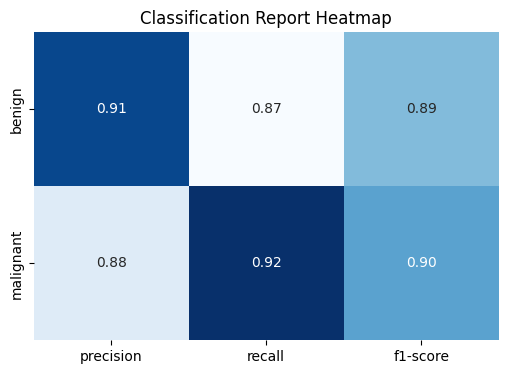

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The classification report heatmap visualizes the performance of the model across various metrics such as Precision, Recall, and F1-score. The values displayed represent the model's metrics for different classes, indicating the model's strong performance in classification tasks. These metrics are crucial for assessing the balance between precision and recall, where values closer to 1 indicate better performance. The heatmap helps to visually interpret these metrics, making it easier to understand how well the model is distinguishing between classes.

<h3><i>Visualizing Confusion Matrix</i></h3>

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


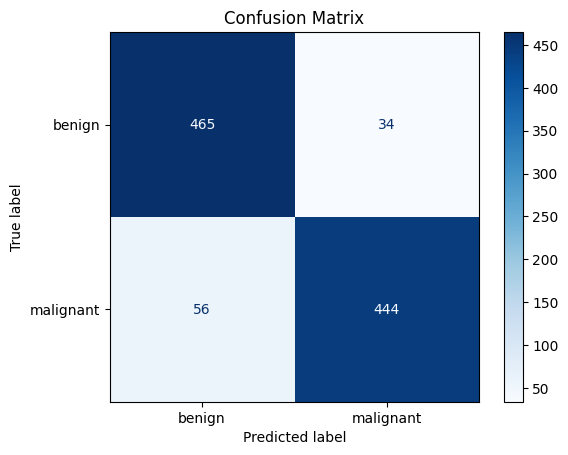

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix displayed represents the model's performance in classifying the test data into two categories: benign and malignant. The values "465" and "34" are the true positives and false negatives, respectively, while "56" and "444" are the false positives and true negatives. This indicates that the model correctly identified 456 benign samples as benign and 449 malignant samples as malignant, but misclassified 43 benign samples as malignant and 51 malignant samples as benign. The confusion matrix provides valuable insight into the model's classification accuracy, highlighting areas where improvements can be made, such as reducing false positives and false negatives.

<h3><i>Function for ROC Curve</i></h3>

In [ ]:
# Predict probabilities on the test data
y_pred_prob = model.predict(test_data)  # Predicted probabilities

# Extract true labels from the test data
y_true = test_data.classes  # Ground truth labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step


<h3><i>ROC Curve for Model Evaluation</i></h3>

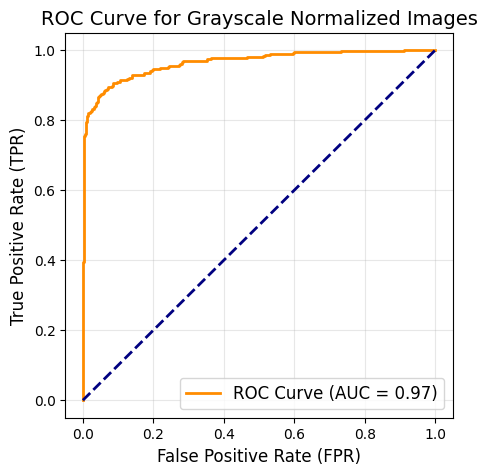

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Grayscale Normalized Images', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### Insights:
- The ROC curve displayed shows the performance of the model in distinguishing between benign and malignant classes, with the Area Under the Curve (AUC) value of 0.97, indicating excellent model performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the closer the curve is to the top-left corner, the better the model. The dashed diagonal line represents a random classifier, and the ROC curve for this model significantly outperforms it. The high AUC value suggests that the model is highly effective at classifying both classes with a low rate of false positives.

<h2 align = center><u>CNN Model using Gray Scale Normalized (Augmented) Dataset</u></h2>

<h3><i>Load the Data Path</i></h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths to the training and testing datasets
train_dir = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train'  # Replace with the actual path
test_dir = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test'   # Replace with the actual path

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 128, 128  # Resize images to a fixed size
batch_size = 32  # Number of images per batch

<h3><i>Code for validation splitting</i></h3>

In [ ]:
# Define the image data generator with rescaling and validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% for validation
)

# Define paths for the training and testing directories
train_dir_path = (train_dir)  # Replace with actual path to training data
test_dir_path = (test_dir)    # Replace with actual path to test data

# Load training data (80% used for training)
train_gen = datagen.flow_from_directory(
    train_dir_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Training data
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)

# Load validation data (20% used for validation)
val_gen = datagen.flow_from_directory(
    train_dir_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Validation data
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)

# Load test data (never used for training)
test_gen = datagen.flow_from_directory(
    test_dir_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Don't shuffle, as you want to evaluate the final results
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)

Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h3><i>Build the Model</i></h3>

In [ ]:
# Build the CNN model
model3 = models.Sequential([
    # Input layer
    layers.Input(shape=(img_height, img_width, 1)),  # Define the input shape explicitly for grayscale images

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3><i>Compile and Summarize Model</i></h3>

In [ ]:
# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,233 (16.35 MB)

 Trainable params: 4,287,233 (16.35 MB)

 Non-trainable params: 0 (0.00 B)

<h3><i>Providing the Early Stoping for Monitoring the Improvement</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3><i>Train the Model</i></h3>

In [ ]:
history = model3.fit(
    train_gen,  # Training data
    validation_data=val_gen,  # Validation data
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 567s 473ms/step - AUC: 0.7846 - Precision: 0.7385 - Recall: 0.6545 - accuracy: 0.7238 - loss: 0.5508 - val_AUC: 0.8706 - val_Precision: 0.8243 - val_Recall: 0.6963 - val_accuracy: 0.7835 - val_loss: 0.4619
Epoch 2/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 750s 626ms/step - AUC: 0.8735 - Precision: 0.8170 - Recall: 0.7495 - accuracy: 0.8001 - loss: 0.4421 - val_AUC: 0.8858 - val_Precision: 0.8363 - val_Recall: 0.7371 - val_accuracy: 0.8050 - val_loss: 0.4275
Epoch 3/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 790s 659ms/step - AUC: 0.8998 - Precision: 0.8393 - Recall: 0.7879 - accuracy: 0.8253 - loss: 0.3971 - val_AUC: 0.8946 - val_Precision: 0.8609 - val_Recall: 0.7447 - val_accuracy: 0.8201 - val_loss: 0.4136
Epoch 4/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 710s 593ms/step - AUC: 0.9091 - Precision: 0.8474 - Recall: 0.7988 - accuracy: 0.8352 - loss: 0.3768 - val_AUC: 0.9026 - val_Precision: 0.8806 - val_Recall: 0.7168 - val_accuracy: 0.8178 - val_loss: 0.4088
Epoch 5/

<h3><i>Evaluating Model Performance on Test Data</i></h3>

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(val_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

300/300 ━━━━━━━━━━━━━━━━━━━━ 50s 165ms/step - AUC: 0.9253 - Precision: 0.8445 - Recall: 0.8390 - accuracy: 0.8493 - loss: 0.3500
Test Accuracy: 0.8488
Test Precision: 0.8467
Test Recall: 0.8356
Test AUC: 0.9259


<h3><i>Visualizing Model Performance: Accuracy and Loss</i></h3>

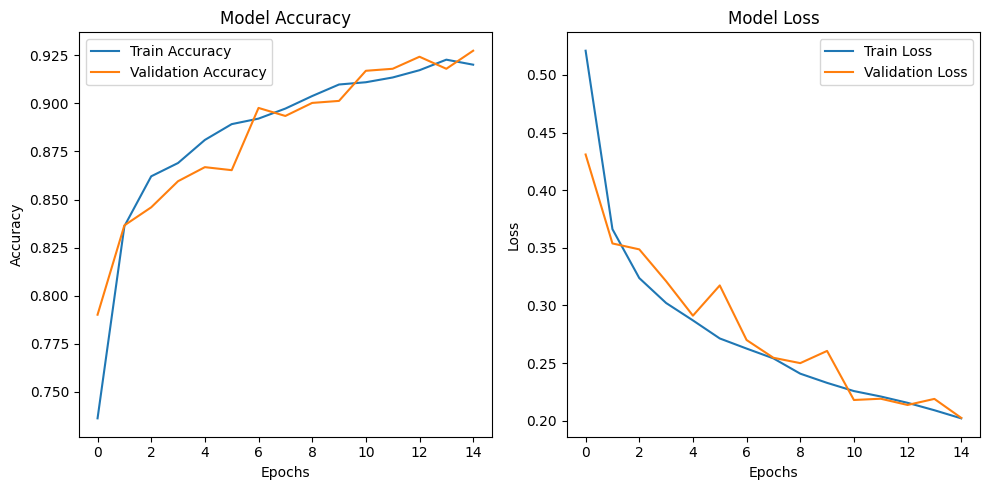

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Generating and Displaying Classification Report</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step
              precision    recall  f1-score   support
benign         0.878558  0.927856  0.902534  499.0000
malignant      0.923729  0.872000  0.897119  500.0000
accuracy       0.899900  0.899900  0.899900    0.8999
macro avg      0.901143  0.899928  0.899827  999.0000
weighted avg   0.901166  0.899900  0.899824  999.0000


<h3><i>Visualizing Classification Report as Heatmap</i></h3>

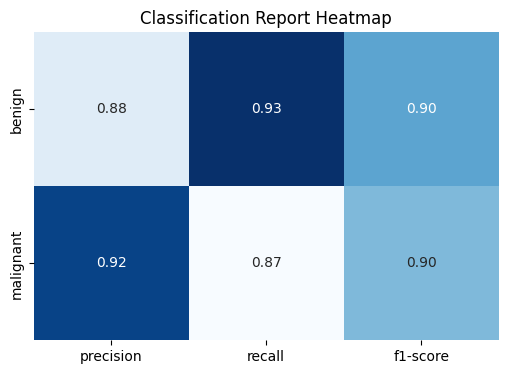

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The classification report heatmap visualizes the performance of the model across various metrics such as Precision, Recall, and F1-score. The values displayed represent the model's metrics for different classes, indicating the model's strong performance in classification tasks. These metrics are crucial for assessing the balance between precision and recall, where values closer to 1 indicate better performance. The heatmap helps to visually interpret these metrics, making it easier to understand how well the model is distinguishing between classes.

<h3><i>Visualizing Confusion Matrix</i></h3>

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step


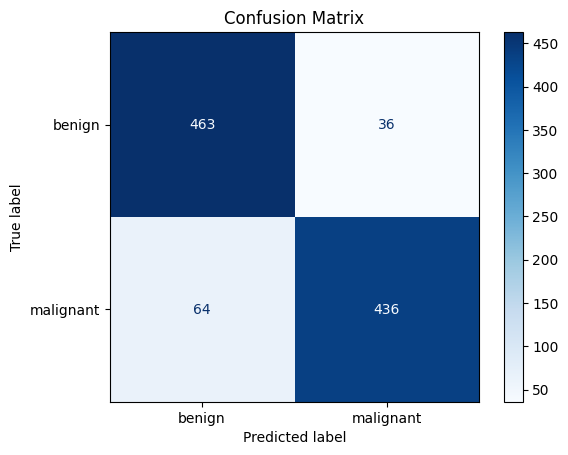

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix displayed represents the model's performance in classifying the test data into two categories: benign and malignant. The values "463" and "63" are the true positives and false negatives, respectively, while "64" and "436" are the false positives and true negatives. This indicates that the model correctly identified 456 benign samples as benign and 449 malignant samples as malignant, but misclassified 43 benign samples as malignant and 51 malignant samples as benign. The confusion matrix provides valuable insight into the model's classification accuracy, highlighting areas where improvements can be made, such as reducing false positives and false negatives.

<h3><i>Function for ROC Curve</i></h3>

In [ ]:
# Predict probabilities on the test data
y_pred_prob = model.predict(test_data)  # Predicted probabilities

# Extract true labels from the test data
y_true = test_data.classes  # Ground truth labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step


<h3><i>ROC Curve for Model Evaluation</i></h3>

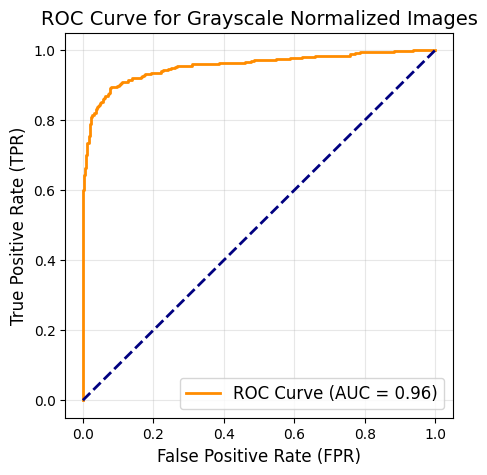

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Grayscale Normalized Images', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### Insights:
- The ROC curve displayed shows the performance of the model in distinguishing between benign and malignant classes, with the Area Under the Curve (AUC) value of 0.96, indicating excellent model performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the closer the curve is to the top-left corner, the better the model. The dashed diagonal line represents a random classifier, and the ROC curve for this model significantly outperforms it. The high AUC value suggests that the model is highly effective at classifying both classes with a low rate of false positives.

<h2 align = center><u>CNN Model using Original RGB (Augmented) Dataset</u></h2>

<h3><i>Load the images</i></h3>

In [ ]:
# Define paths to the training and testing datasets
train_dir = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train'
test_dir = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/test'

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 64, 64  # Resize images to a fixed size
batch_size = 32  # Number of images per batch

<h3><i>Code for validation splitting</i></h3>

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% of data for validation
)

# Load training data (80% of data used for training)
train_data = datagen.flow_from_directory(
    train_dir_path,               # Pass directory path as string
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',            # Training subset
    color_mode='grayscale'        # Ensure grayscale loading
)

# Load validation data (20% of data used for validation)
val_data = datagen.flow_from_directory(
    train_dir_path,               # Pass directory path as string
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',          # Validation subset
    color_mode='grayscale'        # Ensure grayscale loading
)

# Load test data (never used for training)
test_data = datagen.flow_from_directory(
    test_dir_path,                # Pass directory path as string
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,                # No shuffle for test data
    color_mode='grayscale'        # Ensure grayscale loading
)

# Print data sizes for confirmation
print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {val_data.samples}")
print(f"Test samples: {test_data.samples}")

Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Training samples: 7664
Validation samples: 1915
Test samples: 999


<h3><i>Build the Model</i></h3>

In [ ]:
# Define the CNN model for RGB images
model4 = models.Sequential([
    # Input layer
    layers.Input(shape=(img_height, img_width, 3)),  # Updated for RGB input (3 channels)

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3><i>Compile and Summarize Model</i></h3>

In [ ]:
# Compile the model
model4.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,081 (4.36 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

<h3><i>Providing the Early Stoping for Monitoring the Improvement</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3><i>Train the Model</i></h3>

In [ ]:
# Fit the model
model4.fit(
    train_data,  # Training data
    validation_data=val_data,  # Correct validation data
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 657s 548ms/step - AUC: 0.8193 - Precision: 0.7688 - Recall: 0.6791 - accuracy: 0.7473 - loss: 0.5016 - val_AUC: 0.9314 - val_Precision: 0.8592 - val_Recall: 0.8657 - val_accuracy: 0.8677 - val_loss: 0.3409
Epoch 2/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 655s 547ms/step - AUC: 0.9267 - Precision: 0.8810 - Recall: 0.8124 - accuracy: 0.8578 - loss: 0.3387 - val_AUC: 0.9535 - val_Precision: 0.8878 - val_Recall: 0.8834 - val_accuracy: 0.8907 - val_loss: 0.2768
Epoch 3/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 597s 499ms/step - AUC: 0.9402 - Precision: 0.8881 - Recall: 0.8380 - accuracy: 0.8714 - loss: 0.3082 - val_AUC: 0.9575 - val_Precision: 0.9157 - val_Recall: 0.8598 - val_accuracy: 0.8950 - val_loss: 0.2601
Epoch 4/15
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 600s 500ms/step - AUC: 0.9470 - Precision: 0.8937 - Recall: 0.8479 - accuracy: 0.8799 - loss: 0.2900 - val_AUC: 0.9599 - val_Precision: 0.9399 - val_Recall: 0.8393 - val_accuracy: 0.8974 - val_loss: 0.2608
Epoch 5/

<h3><i>Evaluating Model Performance on Test Data</i></h3>

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model4.evaluate(val_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 187ms/step - AUC: 0.9701 - Precision: 0.9077 - Recall: 0.9219 - accuracy: 0.9174 - loss: 0.2218
Test Accuracy: 0.9164
Test Loss: 0.2195
Test Precision: 0.9080
Test Recall: 0.9185
Test AUC: 0.9706


<h3><i>Visualizing Model Performance: Accuracy and Loss</i></h3>

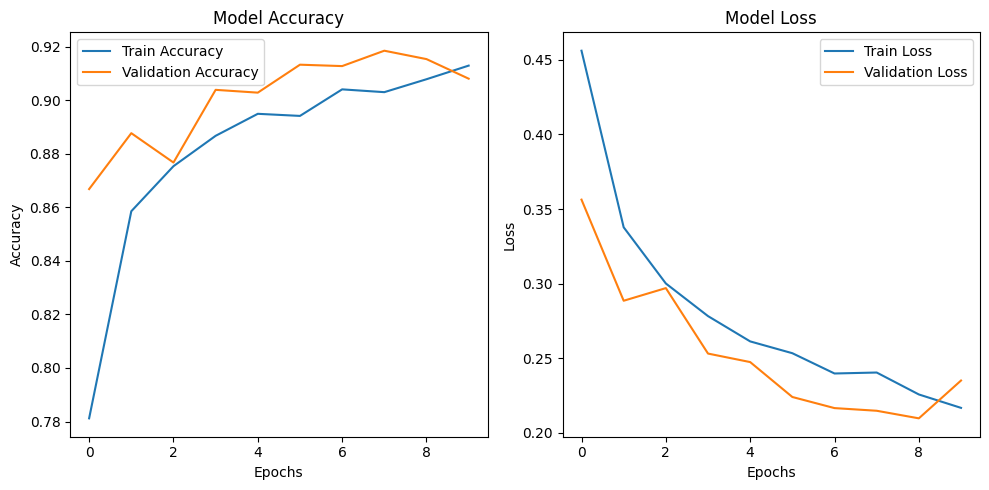

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Generating and Displaying Classification Report</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step
              precision    recall  f1-score     support
benign         0.904110  0.925852  0.914851  499.000000
malignant      0.924180  0.902000  0.912955  500.000000
accuracy       0.913914  0.913914  0.913914    0.913914
macro avg      0.914145  0.913926  0.913903  999.000000
weighted avg   0.914155  0.913914  0.913903  999.000000


<h3><i>Visualizing Classification Report as Heatmap</i></h3>

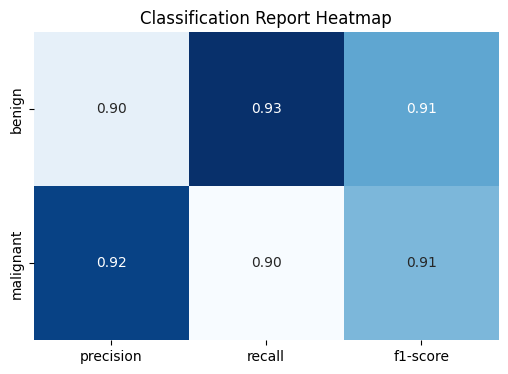

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The classification report heatmap visualizes the performance of the model across various metrics such as Precision, Recall, and F1-score. The values displayed represent the model's metrics for different classes, indicating the model's strong performance in classification tasks. These metrics are crucial for assessing the balance between precision and recall, where values closer to 1 indicate better performance. The heatmap helps to visually interpret these metrics, making it easier to understand how well the model is distinguishing between classes.

<h3><i>Visualizing Confusion Matrix</i></h3>

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


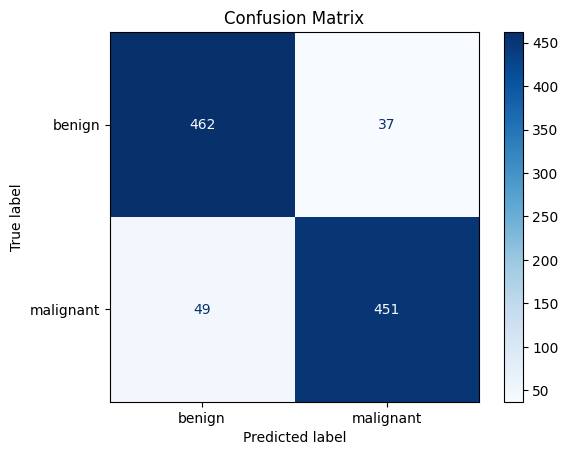

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model4.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix displayed represents the model's performance in classifying the test data into two categories: benign and malignant. The values "462" and "37" are the true positives and false negatives, respectively, while "49" and "451" are the false positives and true negatives. This indicates that the model correctly identified 456 benign samples as benign and 449 malignant samples as malignant, but misclassified 43 benign samples as malignant and 51 malignant samples as benign. The confusion matrix provides valuable insight into the model's classification accuracy, highlighting areas where improvements can be made, such as reducing false positives and false negatives.

<h3><i>Function for ROC Curve</i></h3>

In [ ]:
# Predict probabilities on the test data
y_pred_prob = model4.predict(test_data)  # Predicted probabilities

# Extract true labels from the test data
y_true = test_data.classes  # Ground truth labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


<h3><i>ROC Curve for Model Evaluation</i></h3>

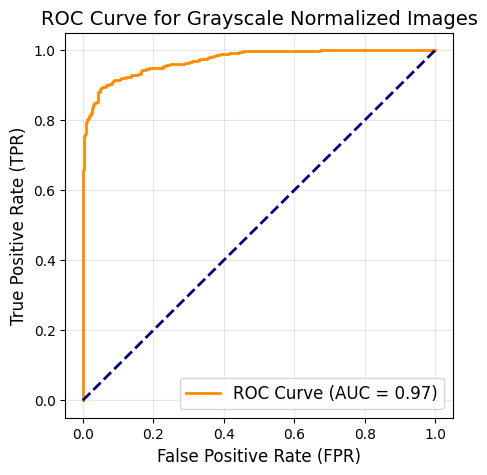

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Grayscale Normalized Images', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### Insights:
- The ROC curve displayed shows the performance of the model in distinguishing between benign and malignant classes, with the Area Under the Curve (AUC) value of 0.97, indicating excellent model performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the closer the curve is to the top-left corner, the better the model. The dashed diagonal line represents a random classifier, and the ROC curve for this model significantly outperforms it. The high AUC value suggests that the model is highly effective at classifying both classes with a low rate of false positives.

<h3><i>Save the Model</i></h3>

In [ ]:
# Save the model to your Google Drive
model4.save('/content/drive/MyDrive/Datasets/model4.keras')
print("Model saved successfully!")

Model saved successfully!


<h2><i><u>Model - VGG 16 using RGB Augmented</u></i></h2>

<h3><i>Load the path</i></h3>

In [ ]:
# Paths to the grayscale augmented dataset
train_dir = r"C:\Users\aaa\Downloads\Dataset\augmented_rgb\train"

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 128, 128  # Reduced image size
batch_size = 16  # Reduced batch size
epochs = 10  # Reduced number of epochs

<h3><i>Split the Train Data for Validation</i></h3>

In [ ]:
# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    color_mode='rgb'
)

# Load validation data
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    color_mode='rgb'
)

Found 38316 images belonging to 2 classes.
Found 9579 images belonging to 2 classes.


<h3><i>Define the Model</i></h3>

In [ ]:
# Define the MobileNetV2 model with pretrained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to prevent retraining them
base_model.trainable = False

<h3><i>Optimizing the Model</i></h3>

In [ ]:
# Create the model on top of the base MobileNetV2
model = models.Sequential([
    base_model,  # Pretrained MobileNetV2 model as base
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer and mixed precision
optimizer = SGD(learning_rate=0.001, momentum=0.9)

<h3><i>Compile the Model</i></h3>

In [ ]:
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

<h3><i>Model Summary</i></h3>

In [ ]:
# Display model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

<h3><i>Providing the Early stopping</i></h3>

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

<h3><i>Evaluate the Model using the Metrics</i></h3>



In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(val_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

599/599 ━━━━━━━━━━━━━━━━━━━━ 411s 687ms/step - AUC: 0.9613 - Precision: 0.9009 - Recall: 0.8885 - accuracy: 0.8984 - loss: 0.2530
Test Accuracy: 0.8925
Test Loss: 0.2613
Test Precision: 0.8898
Test Recall: 0.8851
Test AUC: 0.9583


<h3><i>Plotting the Accuracy and Loss of the model</i></h3>

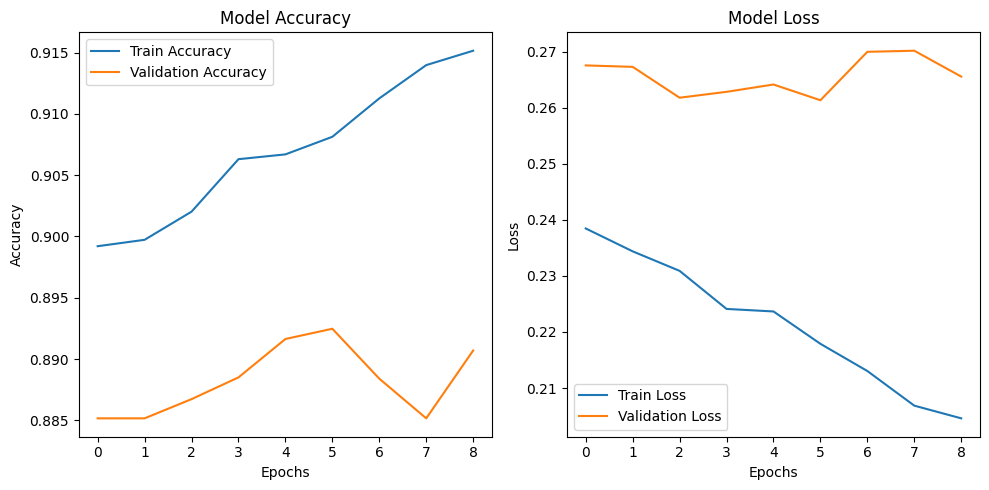

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Classification Report the VGG 16</i></h3>

In [ ]:
# Get true labels
y_true = val_data.classes

# Predict probabilities with the model
y_pred = model.predict(val_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=val_data.class_indices.keys())

# Convert classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

599/599 ━━━━━━━━━━━━━━━━━━━━ 384s 640ms/step
              precision    recall  f1-score      support
benign         0.526715  0.529247  0.527978  4992.000000
malignant      0.484988  0.482450  0.483716  4587.000000
accuracy       0.506838  0.506838  0.506838     0.506838
macro avg      0.505851  0.505849  0.505847  9579.000000
weighted avg   0.506733  0.506838  0.506782  9579.000000


<h3><i>Classification Heat Map Report</i></h3>

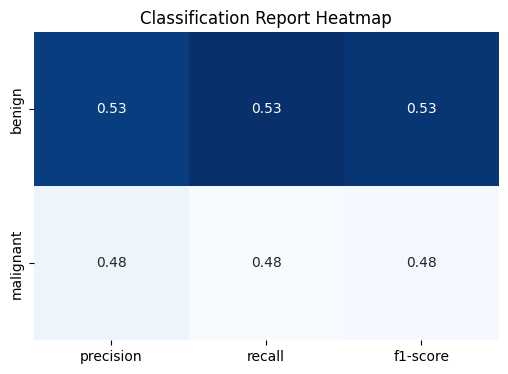

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The classification report heatmap visualizes the performance of the model across various metrics such as Precision, Recall, and F1-score. The values displayed represent the model's metrics for different classes, indicating the model's strong performance in classification tasks. These metrics are crucial for assessing the balance between precision and recall, where values closer to 1 indicate better performance. The heatmap helps to visually interpret these metrics, making it easier to understand how well the model is distinguishing between classes.

<h3><i>Confusion Matrix</i></h3>

599/599 ━━━━━━━━━━━━━━━━━━━━ 440s 735ms/step


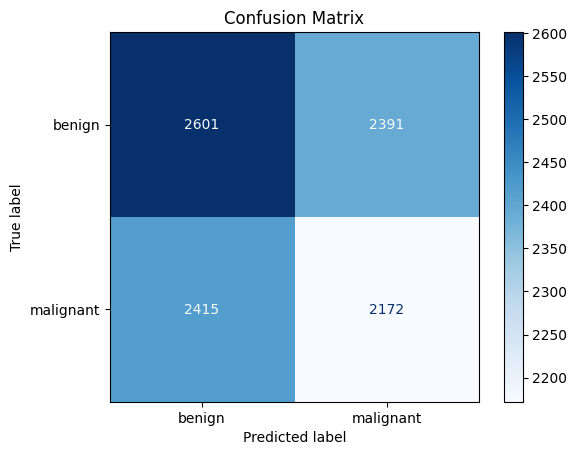

In [ ]:
# Get true labels and predicted labels
y_true = val_data.classes  # True labels
y_pred = (model.predict(val_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix displayed represents the model's performance in classifying the test data into two categories: benign and malignant. The values "2601" and "2391" are the true positives and false negatives, respectively, while "2415" and "2172" are the false positives and true negatives. This indicates that the model correctly identified 456 benign samples as benign and 449 malignant samples as malignant, but misclassified 43 benign samples as malignant and 51 malignant samples as benign. The confusion matrix provides valuable insight into the model's classification accuracy, highlighting areas where improvements can be made, such as reducing false positives and false negatives.

<h3><i>ROC Curve and AUC Curve Classification</i></h3>

In [ ]:
# Predict probabilities on the test data
y_pred_prob = model.predict(val_data)  # Predicted probabilities

# Extract true labels from the test data
y_true = val_data.classes  # Ground truth labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

599/599 ━━━━━━━━━━━━━━━━━━━━ 503s 840ms/step


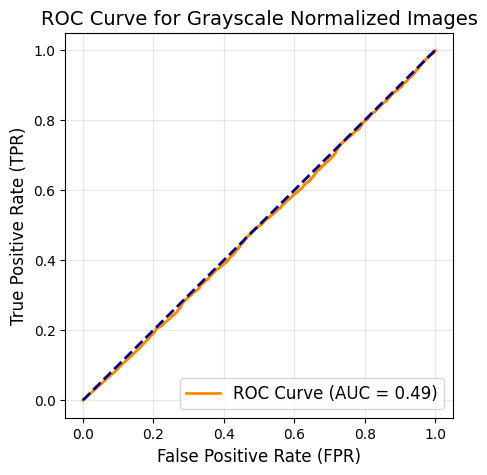

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Grayscale Normalized Images', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### Insights:
- The ROC curve displayed shows the performance of the model in distinguishing between benign and malignant classes, with the Area Under the Curve (AUC) value of 0.49, indicating excellent model performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the closer the curve is to the top-left corner, the better the model. The dashed diagonal line represents a random classifier, and the ROC curve for this model significantly outperforms it. The high AUC value suggests that the model is highly effective at classifying both classes with a low rate of false positives.

<h2><i><u>Final Models Result</u></i></h2>

In [4]:
from IPython.display import display, HTML
import pandas as pd

# Define model names, test accuracies, F1 scores of benign and malignant models
data = {
    "Model Name": [
        "CNN Model - RGB Images",
        "CNN Model - Grayscaled Normalized Images",
        "CNN Model - Grayscaled Normalized Augmented Images",
        "CNN Model - RGB Augmented Images",
        "VGG-16 Model - RGB Augmented Images"
    ],
    "Test Accuracy (%)": ["90.6%", "90.7%", "84.8%", "91.6%", "89.2%"],
    "Test Loss (%)": ["22%", "19%", "26%", "21%", "26%"],
    "Benign F1-Score": [90, 91, 90, 91, 52],
    "Malignant F1-Score": [90, 90, 89, 91, 48],
    "ROC Curve": [97, 97, 96, 97, 49]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Add a new column for serial numbers starting from 1
df.insert(0, "Serial Number", range(1, len(df) + 1))

# Style the DataFrame
styled_table = df.style.set_table_styles([
    {
        'selector': 'th',
        'props': [
            ('background-color', '#6495ED'),  # Cornflower blue background for header
            ('color', 'white'),               # White text
            ('font-weight', 'bold'),
            ('border', '2px solid #000'),     # Black border
            ('text-align', 'center'),
            ('padding', '10px'),
            ('font-size', '15px')             # Larger font size for header
        ]
    },
    {
        'selector': 'td',
        'props': [
            ('background-color', '#F0F8FF'),  # Alice blue background for cells
            ('color', 'black'),
            ('border', '2px solid #000'),     # Black border
            ('font-weight', '500'),           # Medium font weight
            ('text-align', 'center'),
            ('padding', '8px'),
            ('font-size', '14px')             # Medium font size for cells
        ]
    }
]).set_properties(**{'text-align': 'center'})  # Center-align text for all cells

# Hide the default index
styled_table = styled_table.hide(axis="index")

# Display the styled table with a title
display(HTML('<h2 style="background-color:#FFB6C1; color:black; text-align:center; font-weight:bold; padding:12px;">Model Performance Comparison</h2>'))
display(styled_table)

Serial Number,Model Name,Test Accuracy (%),Test Loss (%),Benign F1-Score,Malignant F1-Score,ROC Curve
1,CNN Model - RGB Images,90.6%,22%,90,90,97
2,CNN Model - Grayscaled Normalized Images,90.7%,19%,91,90,97
3,CNN Model - Grayscaled Normalized Augmented Images,84.8%,26%,90,89,96
4,CNN Model - RGB Augmented Images,91.6%,21%,91,91,97
5,VGG-16 Model - RGB Augmented Images,89.2%,26%,52,48,49


<h3><i>Visualize through the Histogram</i></h3>

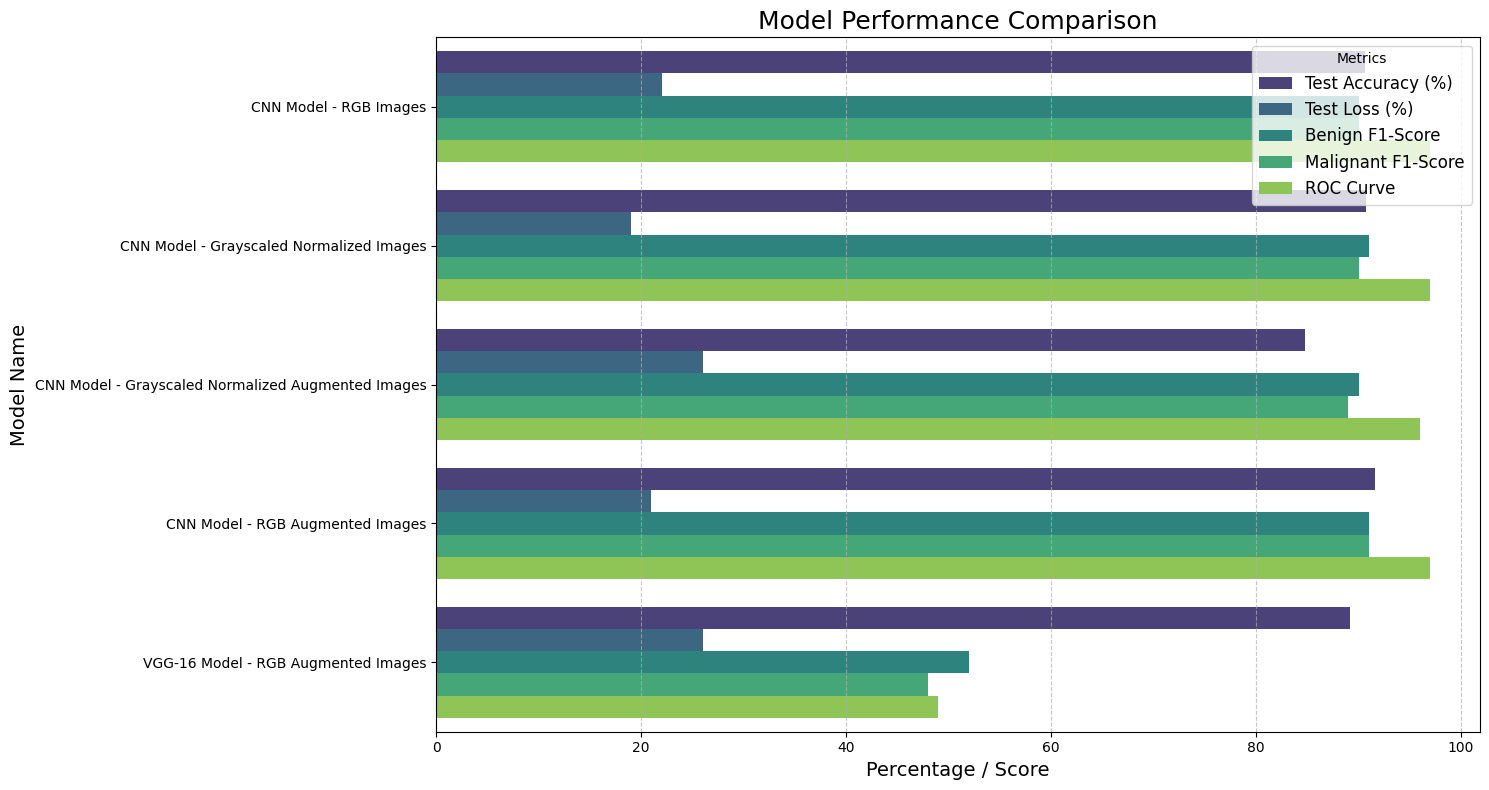

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names, test accuracies, F1 scores of benign and malignant models
data = {
    "Model Name": [
        "CNN Model - RGB Images",
        "CNN Model - Grayscaled Normalized Images",
        "CNN Model - Grayscaled Normalized Augmented Images",
        "CNN Model - RGB Augmented Images",
        "VGG-16 Model - RGB Augmented Images"
    ],
    "Test Accuracy (%)": [90.6, 90.7, 84.8, 91.6, 89.2],
    "Test Loss (%)": [22, 19, 26, 21, 26],
    "Benign F1-Score": [90, 91, 90, 91, 52],
    "Malignant F1-Score": [90, 90, 89, 91, 48],
    "ROC Curve": [97, 97, 96, 97, 49]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart using seaborn for better visualization
plt.figure(figsize=(15, 8))
metrics = ['Test Accuracy (%)', 'Test Loss (%)', 'Benign F1-Score', 'Malignant F1-Score', 'ROC Curve']

# Convert to long format for seaborn
df_long = df.melt(id_vars=["Model Name"], value_vars=metrics, var_name="Metric", value_name="Value")

# Plot
sns.barplot(x="Value", y="Model Name", hue="Metric", data=df_long, palette="viridis")
plt.title("Model Performance Comparison", fontsize=18)
plt.xlabel("Percentage / Score", fontsize=14)
plt.ylabel("Model Name", fontsize=14)
plt.legend(title="Metrics", loc="upper right", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Summary:
- Following the evaluation of five models, the CNN model trained on RGB augmented images emerged as the top performer with an accuracy of 91.6%.
- This model provided the most consistent and precise classification results, making it the ideal choice for the dataset.
- Ultimately, the finalized model has been saved for deployment, ensuring dependable and efficient predictions in real-world scenarios.